# Analysis on Udemy courses

### About

The aim of this project is to complete the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). In this course, I had a practical and beginner-friendly introduction to data analysis covering the basics of Python, Numpy, Pandas, Data Visualization, and Exploratory Data Analysis. I fully recommend it! 

As you may know, Udemy, Inc. is a global destination for teaching and learning online. It was founded in May 2010 by Eren Bali, Gagan Biyani, and Oktay Caglar.
As of November 2022, the platform has more than 57 million students, 213,000 courses, and 74,000 instructors teaching courses in over 75 languages. You will find more information at [wikipedia.org/wiki/Udemy](https://en.wikipedia.org/wiki/Udemy).

### Dataset

The Udemy courses dataset used in this project was obtained from [kaggle](https://www.kaggle.com/datasets/iamjayantchauhan/udemy-course-data).


## Downloading the Dataset

Let's begin installing all the necessary modules.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/iamjayantchauhan/udemy-course-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./udemy-course-data" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './udemy-course-data'

In [5]:
import os
os.listdir(data_dir)

['Course_info.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "udemy_course_info"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "raristu/udemy-course-info" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/raristu/udemy-course-info


'https://jovian.ai/raristu/udemy-course-info'

## Data Preparation and Cleaning

Firstly, I will import the pandas module to load the .csv file into a data frame for further analysis.
Secondly, I will explore some basic info from the data frame such as: columns info, statistics, incorrect/invalid data, etc.

In [10]:
import pandas as pd

In [11]:
udemy_df = pd.read_csv('./udemy-course-data/Course_info.csv')

In [12]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [13]:
udemy_df.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


In [14]:
udemy_df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


As part of data preparation, let's replace in column 'is_paid' the True/False values by Paid/Free.

In [15]:
udemy_df['is_paid']= udemy_df['is_paid'].replace(to_replace=[True, False], value=['Paid','Free'])
udemy_df

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,Paid,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,Free,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",Paid,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,Paid,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,Paid,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209729,4913954.0,Let's Speak Urdu - The Urdu Grammar,Paid,19.99,Urdu - Become fluent in this beautiful South A...,3.0,0.00,0.0,0.0,5.0,54.0,2022-10-05T11:31:36Z,2022-10-06,Teaching & Academics,Language Learning,Urdu Language,English,/course/lets-speak-urdu-the-grammar/,Jawaid Hameed,/user/jawaid-hameed/
209730,4914146.0,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,Paid,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05T12:29:23Z,2022-10-05,IT & Software,IT Certifications,CompTIA Linux+,English,/course/comptia-linux-xko-004005-2-practice-ex...,Jean-François d'Halluin,/user/badre-lini/
209731,4914002.0,CISSP 4 full exams #1 : All CISSP domains - 12...,Paid,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,0.0,2022-10-05T11:04:05Z,2022-10-05,IT & Software,IT Certifications,CISSP - Certified Information Systems Security...,English,/course/cissp-4-full-exams-1-all-cissp-domains...,Jean-François d'Halluin,/user/badre-lini/
209732,4913934.0,JD Edwards EnterpriseOne Fixed Assets Accounti...,Paid,119.99,Full-length course (Part-3 of 3) on JD Edwards...,0.0,0.00,0.0,0.0,9.0,82.0,2022-10-05T10:30:19Z,2022-10-05,Finance & Accounting,Other Finance & Accounting,Financial Accounting,English,/course/jde-fixed-assets-accounting-part-3/,Niranjan Bhatia,/user/systemic-software-solutions/


In [16]:
udemy_df.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url'],
      dtype='object')

In [17]:
udemy_df.isna().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

## Exploratory Analysis and Visualization

Before we asked questions about Udemy courses, let's see some graphs that will help us to understand the data we are analysing.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.


In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's continue obtaining some interesting figures and represent them in some graphs.

### Number of Paid / Free courses

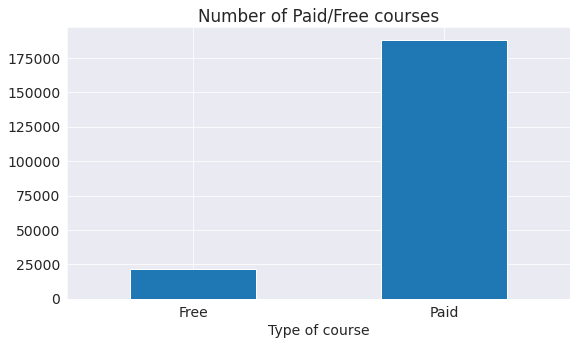

In [19]:
#Graph with number of paid and free courses 
udemy_paid_courses = udemy_df.groupby('is_paid')['is_paid'].count()
udemy_paid_courses.plot(kind='bar')
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel('Type of course')
plt.title('Number of Paid/Free courses');

### Top 10 courses by number of subscribers

In [20]:
#Top 10 courses by number of subscribers
course_subscribers = udemy_df.sort_values('num_subscribers', ascending=False)[['title','num_subscribers']].set_index('title').head(10)
course_subscribers

,num_subscribers
title,
Java Tutorial for Complete Beginners,1752364.0
2022 Complete Python Bootcamp From Zero to Hero in Python,1612862.0
Microsoft Excel - Excel from Beginner to Advanced,1108811.0
Automate the Boring Stuff with Python Programming,1056369.0
Machine Learning A-Z™: Hands-On Python & R In Data Science,896340.0
The Web Developer Bootcamp 2022,823805.0
Introduction To Python Programming,783638.0
The Complete 2022 Web Development Bootcamp,771176.0
Java Programming Masterclass covering Java 11 & Java 17,720304.0


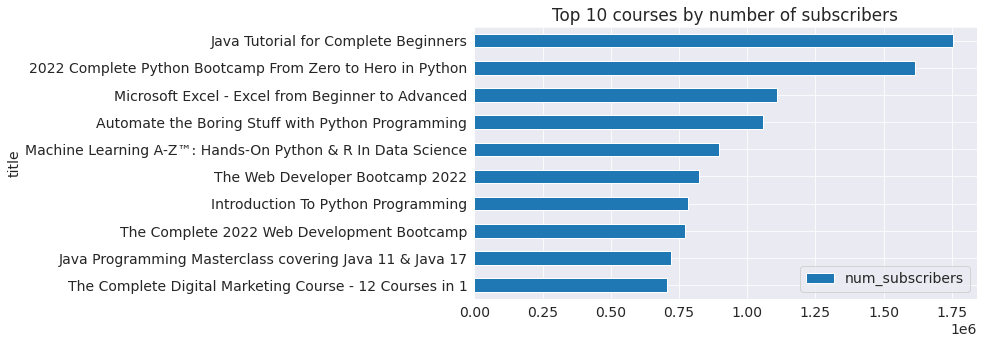

In [21]:
#Graph with top 10 courses by number of subscribers
course_subscribers.sort_values(by='num_subscribers', ascending=True).plot(kind='barh');
plt.legend()
plt.title('Top 10 courses by number of subscribers');

### Top 10 courses by number of reviews

In [22]:
#Table with top 10 courses by number of reviews
course_reviews = udemy_df.sort_values('num_reviews', ascending=False)[['title','num_reviews']].set_index('title').head(10)
course_reviews

,num_reviews
title,
2022 Complete Python Bootcamp From Zero to Hero in Python,436457.0
Microsoft Excel - Excel from Beginner to Advanced,332598.0
The Web Developer Bootcamp 2022,246624.0
The Complete 2022 Web Development Bootcamp,228108.0
Angular - The Complete Guide (2022 Edition),172991.0
Java Programming Masterclass covering Java 11 & Java 17,170478.0
"React - The Complete Guide (incl Hooks, React Router, Redux)",163324.0
Machine Learning A-Z™: Hands-On Python & R In Data Science,162432.0
The Complete Digital Marketing Course - 12 Courses in 1,154985.0


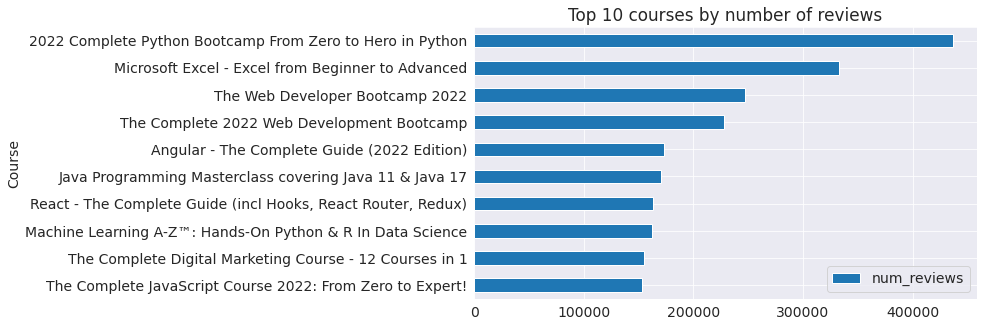

In [23]:
#Graph with top 10 courses by number of reviews
course_reviews.sort_values(by='num_reviews', ascending=True).plot(kind='barh')
plt.ylabel('Course')
plt.title('Top 10 courses by number of reviews');

### Number of courses by category

In [24]:
#Number of courses by category
courses_by_categories = udemy_df.groupby('category')[['id']].count().sort_values(by='id',ascending=False)
courses_by_categories.columns = courses_by_categories.columns.str.replace('id', 'num_courses')
courses_by_categories

,num_courses
category,
Development,31643
IT & Software,30479
Teaching & Academics,26293
Business,24670
Personal Development,21239
Design,15256
Health & Fitness,11568
Marketing,11221
Lifestyle,10653


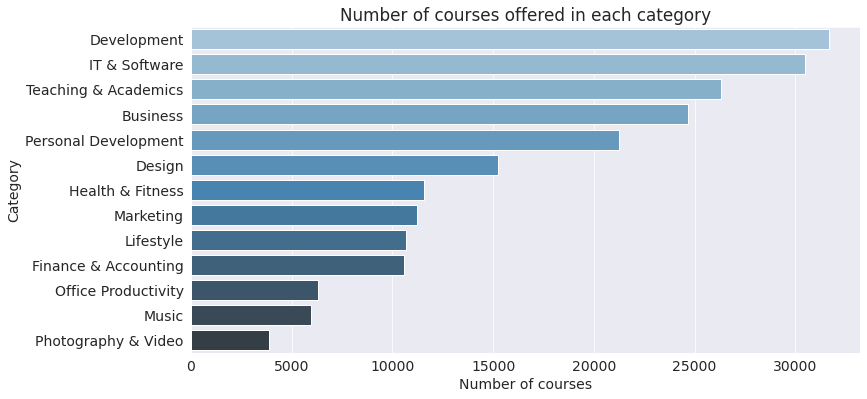

In [25]:
#Graph with number of courses by category
plt.figure(figsize=(12, 6))
sns.barplot(x='num_courses', y=courses_by_categories.index , data=courses_by_categories, palette='Blues_d')
plt.xlabel("Number of courses")
plt.ylabel("Category")
plt.title("Number of courses offered in each category");

### Number of courses by instructor

In [26]:
#Number of courses by instructor
courses_by_instructor = udemy_df.groupby('instructor_name')[['is_paid']].count().sort_values(by='is_paid',ascending=False).head(10)
courses_by_instructor.columns = courses_by_instructor.columns.str.replace('is_paid', 'num_courses')
courses_by_instructor

,num_courses
instructor_name,
Packt Publishing,1254
Bluelime Learning Solutions,422
Illumeo Learning,410
Laurence Svekis,327
Infinite Skills,323
Bilal Semih Bozdemir,321
HowExpert,288
Sarita Wariyer,274
Stone River eLearning,270


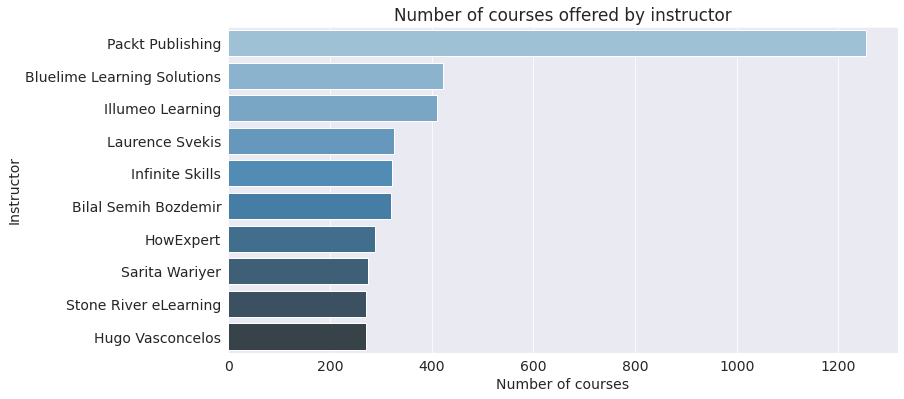

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num_courses', y=courses_by_instructor.index , data=courses_by_instructor, palette='Blues_d')
plt.xlabel("Number of courses")
plt.ylabel("Instructor")
plt.title("Number of courses offered by instructor");

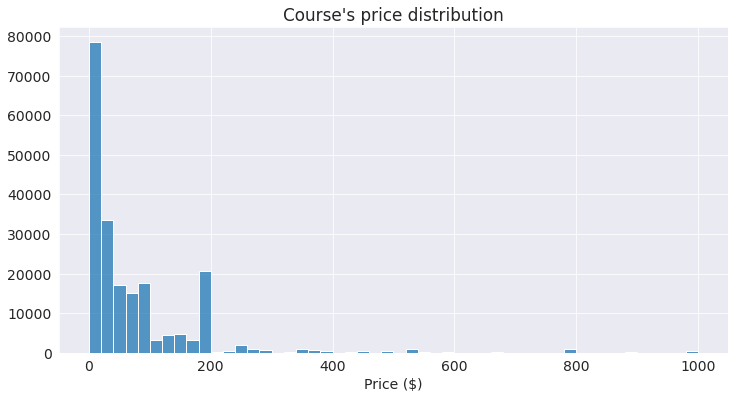

In [28]:
# Distribution of price of udemy courses
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=udemy_df, x='price', bins=50)
plt.xlabel("Price ($)")
plt.ylabel('')
plt.title("Course's price distribution");

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

The exploratory analysis and visualization gave us a general idea of the data set we are analyzing. Let's ask some specific questions and try to answer them making some queries to our data frame.


#### Q1: Which is the average price of a Udemy course? 

For this question, we will only take into account only the "Paid" courses.

In [29]:
average_price = round(udemy_df[udemy_df['is_paid']=='Paid']['price'].mean(),2)
average_price

91.11

If we discard the Free courses, the average price among the paid courses is $ 91.11

#### Q2: Which are the top 10 topics by number of subscribers?

In [30]:
topics_top10 = udemy_df.groupby('topic')[['num_subscribers']].sum().sort_values(by='num_subscribers',ascending=False).head(10)
topics_top10

,num_subscribers
topic,
Python,32516280.0
Excel,12822452.0
JavaScript,11801744.0
Java,11203723.0
Web Development,9293697.0
Photoshop,8976024.0
Ethical Hacking,8280273.0
WordPress,7080627.0
CSS,6482557.0


As we can see in the table above, Python is the most popular topic on Udemy, followed by Excel.

#### Q3: For all the categories, is there any relation between the length duration of a course and its number of subscribers?

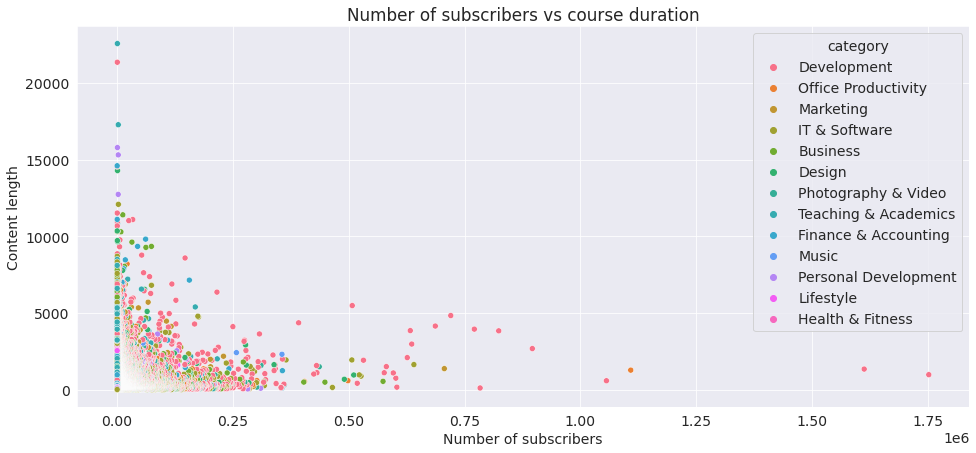

In [31]:
subscribers_vs_content_length = udemy_df.sort_values('num_subscribers', ascending=False)[['title','category','num_subscribers','content_length_min']].set_index('title')
fig, ax = plt.subplots(figsize=(16,7))
sns.scatterplot(x=subscribers_vs_content_length.num_subscribers, y=subscribers_vs_content_length.content_length_min, hue=subscribers_vs_content_length.category)
plt.xlabel('Number of subscribers')
plt.ylabel('Content length')
plt.title('Number of subscribers vs course duration');

It seems that courses of more than 10000 minutes long are less popular than shorter ones.

Let's see this point only for the "Development" category.

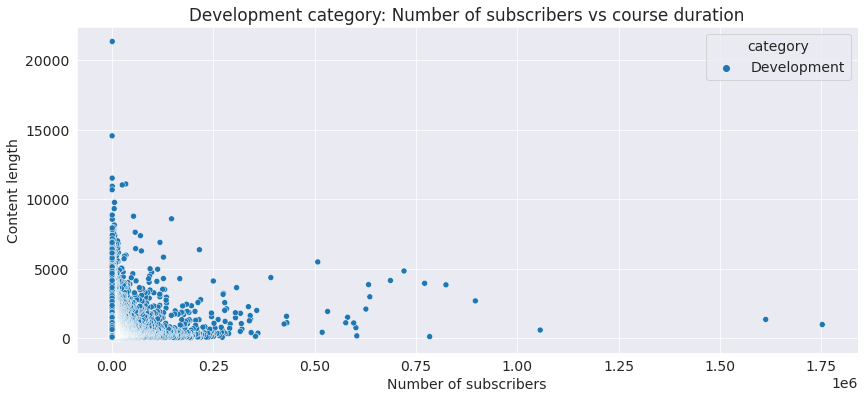

In [32]:
subscribers_vs_content_length = udemy_df.sort_values('num_subscribers', ascending=False)[['title','category','num_subscribers','content_length_min']].set_index('title')
development_courses = subscribers_vs_content_length[subscribers_vs_content_length.category =='Development']
fig, ax = plt.subplots(figsize=(14,6))
sns.scatterplot(x=development_courses.num_subscribers, y=development_courses.content_length_min, hue=development_courses.category)
plt.xlabel('Number of subscribers')
plt.ylabel('Content length')
plt.title('Development category: Number of subscribers vs course duration');

Having a look to the above graph, it seems that the long courses (courses of more than 5000 minutes length) are less popular than short courses.

#### Q4: Which are the top 10 instructor's earnings?

In [33]:
udemy_df['earnings (millions)'] = (udemy_df['price']*udemy_df['num_subscribers']).astype(float)/1000000 
instructors_earnings = udemy_df.groupby('instructor_name')[['instructor_name','earnings (millions)']].sum().sort_values(by='earnings (millions)',ascending=False).head(10)
instructors_earnings

,earnings (millions)
instructor_name,
Srinidhi Ranganathan,1735.131640
Learn Tech Plus,1198.360878
TJ Walker,1171.615935
Jose Portilla,818.904784
YouAccel Training,801.222163
Creative Online School,638.075198
Robert (Bob) Steele,629.703391
Kirill Eremenko,543.566459
Joseph Delgadillo,543.485234


I guess that these figures are not the final income that the instructors receive because we have not taken into account Udemy's fee, discounts, etc.

#### Q5: Which is the average rating (out of 5) per course category?

In [34]:
avg_rating = udemy_df.groupby('category')[['category','topic','avg_rating']].mean().sort_values(by='avg_rating',ascending=False)
avg_rating

,avg_rating
category,
Development,3.988881
Office Productivity,3.913153
Music,3.883336
Design,3.853691
Photography & Video,3.827032
Business,3.816333
Marketing,3.721197
IT & Software,3.719369
Lifestyle,3.712144


Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

Udemy is great learning/teaching platform that offers a big number of courses. 

These are some conclusions obtained during the analysis:

   - Although most of the courses are Paid (more than 80%).
   - The most popular category is Development and also the one which offers more number of courses.
   - The most popular topic is Python.
   - Most of the paid courses are below $ 200.
   - Short length courses have more subscribers than long ones.

## References and Future Work

**REFERENCES:** 
      
   - All my doubts were solved using https://stackoverflow.com
   - I used https://matplotlib.org and https://seaborn.pydata.org/ for doubts about graphs.
   - The data set use in this project was downloaded from https://www.kaggle.com/datasets/iamjayantchauhan/udemy-course-data


**FUTURE WORK:**

   - Analyze courses by language
   - Analyze other similar platforms (maybe Jovian if data set is available 😉)


In [35]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>